In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the Enron Email Dataset

In [ ]:
df = pd.read_csv('emails.csv')

In [ ]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


## Extracting the details of the mail from the message

In [ ]:
import pandas as pd
import email

# Assuming 'df' is your DataFrame with the 'message' column
def parse_email(message):
    msg = email.message_from_string(message)
    return {
        'Message-ID': msg['Message-ID'],
        'Date': msg['Date'],
        'From': msg['From'],
        'To': msg['To'],
        'Subject': msg['Subject'],
        'Body': msg.get_payload()
    }

# Apply the parsing function to the 'message' column
parsed_emails = df['message'].apply(parse_email)

# Convert the parsed emails into a DataFrame
emails_df = pd.DataFrame(parsed_emails.tolist())

# Concatenate the new DataFrame with the original one
final_df = pd.concat([df, emails_df], axis=1)

# Drop the original 'message' column
final_df.drop('message', axis=1, inplace=True)

In [ ]:
final_df.head()

,file,Message-ID,Date,From,To,Subject,Body
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.


## Defining labels with k means clustering

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Drop rows with missing values
final_df.dropna(subset=['Body'], inplace=True)

In [ ]:
# Define X
X = final_df['Body']

In [ ]:
# Converting the text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
# Applying K-Means clustering
num_clusters = 5  # You can adjust this number based on your dataset and requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

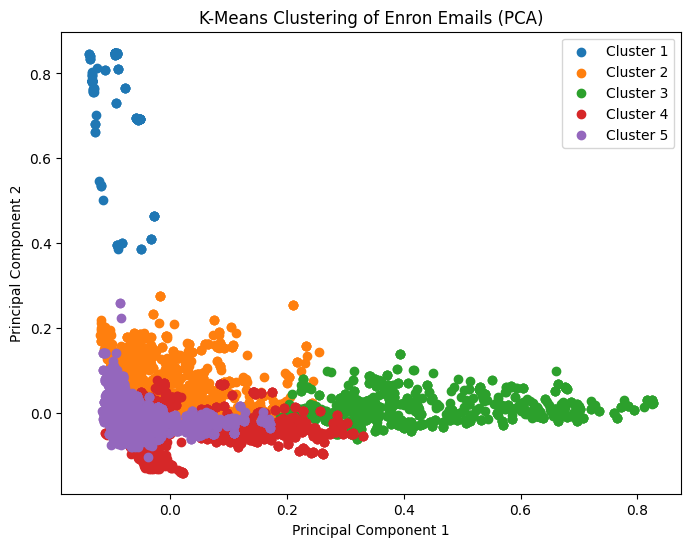

In [ ]:
# Plot clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
    plt.scatter(X_pca[kmeans.labels_ == cluster_id, 0],
                X_pca[kmeans.labels_ == cluster_id, 1],
                label=f'Cluster {cluster_id + 1}')

plt.title('K-Means Clustering of Enron Emails (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
# Assign cluster labels to the dataset
final_df['cluster'] = kmeans.labels_

# Sample emails from each cluster for manual inspection
sample_emails = []
for cluster_id in range(num_clusters):
    sample_email = final_df[final_df['cluster'] == cluster_id]['Body'].sample(n=5, random_state=42).values
    sample_emails.extend(sample_email)

In [ ]:
cluster_labels = {
    0: 'Meeting',
    1: 'Deadline',
    2: 'General',
    3: 'Project Update',
    4: 'Feedback'
}

# Assign labels to the dataset
final_df['label'] = final_df['cluster'].map(cluster_labels)

# Save the labeled dataset
final_df.to_csv('labeled_emails.csv', index=False)

## Now exploring the labeled emails csv

In [ ]:
df2 = pd.read_csv('labeled_emails.csv')

In [ ]:
df2

,file,Message-ID,Date,From,To,Subject,Body,cluster,label
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,Here is our forecast\n\n,4,Feedback
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...,4,Feedback
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,test successful. way to go!!!,4,Feedback
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",4,Feedback
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,4,Feedback
...,...,...,...,...,...,...,...,...,...
10739,bass-e/_sent_mail/402.,<25113555.1075854717213.JavaMail.evans@thyme>,"Wed, 20 Sep 2000 05:23:00 -0700 (PDT)",eric.bass@enron.com,jason.bass2@compaq.com,RE:,that's great!\nwhat do you want for taylor?\n\...,1,Deadline
10740,bass-e/_sent_mail/403.,<2327882.1075854717235.JavaMail.evans@thyme>,"Wed, 20 Sep 2000 05:05:00 -0700 (PDT)",eric.bass@enron.com,jason.bass2@compaq.com,NaN,what do you want for taylor?,4,Feedback
10741,bass-e/_sent_mail/404.,<249544.1075854717256.JavaMail.evans@thyme>,"Wed, 20 Sep 2000 04:51:00 -0700 (PDT)",eric.bass@enron.com,patrick.ryder@enron.com,Pollard,$2 bid for Marcus Pollard,4,Feedback
10742,bass-e/_sent_mail/405.,<33346158.1075854717277.JavaMail.evans@thyme>,"Wed, 20 Sep 2000 04:48:00 -0700 (PDT)",eric.bass@enron.com,patrick.ryder@enron.com,kennison,please take me out of my bid for kennison,4,Feedback


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Splitting the data

In [ ]:
x = df2['Body']
y = df2['label']

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Removing stopwords

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have the stop words set downloaded
# nltk.download('stopwords')

def remove_stop_words(email_body):
    # Tokenize the email body
    word_tokens = word_tokenize(email_body)

    # Set of English stop words
    stop_words = set(stopwords.words('english'))

    # Remove stop words
    filtered_email_body = [word for word in word_tokens if not word.lower() in stop_words]

    # Join the words back into a string
    filtered_email_body = ' '.join(filtered_email_body)

    return filtered_email_body

# Example usage:
email_body = "This is an example email body with some common stop words."
clean_email_body = remove_stop_words(email_body)
print(clean_email_body)

example email body common stop words .


In [ ]:
df2['Body'] = df2['Body'].apply(remove_stop_words)

In [ ]:
# Convert text data into TF-IDF vectors with stop words removal
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

## Train and evaluate multiple classifiers

In [ ]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_tfidf, y_train)
nb_pred = nb_classifier.predict(x_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.7729176361098186


In [ ]:
# Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train_tfidf, y_train)
svm_pred = svm_classifier.predict(x_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9823173569101907


In [ ]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_tfidf, y_train)
rf_pred = rf_classifier.predict(x_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9776640297812936


In [ ]:
# Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(x_train_tfidf, y_train)
lr_pred = lr_classifier.predict(x_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9851093531875291


## Cross Checking

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Define a function to calculate evaluation metrics
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions on training set
    train_preds = model.predict(x_train)
    # Predictions on testing set
    test_preds = model.predict(x_test)

    # Calculate evaluation metrics for training set
    train_precision = precision_score(y_train, train_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    train_f1 = f1_score(y_train, train_preds, average='weighted')

    # Calculate evaluation metrics for testing set
    test_precision = precision_score(y_test, test_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')
    test_f1 = f1_score(y_test, test_preds, average='weighted')

    return train_precision, train_recall, train_f1, test_precision, test_recall, test_f1

In [ ]:
# Define models
models = {
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

In [ ]:
# Looping through models and evaluating
for name, model in models.items():
    print(f"Evaluating {name}...")
    train_precision, train_recall, train_f1, test_precision, test_recall, test_f1 = evaluate_model(model, x_train_tfidf, y_train, x_test_tfidf, y_test)
    print(f"Training Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-score: {train_f1:.4f}")
    print(f"Testing Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")


Evaluating Naive Bayes...
Training Precision: 0.8359, Recall: 0.7909, F1-score: 0.7713
Testing Precision: 0.8203, Recall: 0.7729, F1-score: 0.7456
Evaluating Support Vector Machine...
Training Precision: 0.9986, Recall: 0.9986, F1-score: 0.9986
Testing Precision: 0.9825, Recall: 0.9823, F1-score: 0.9824
Evaluating Random Forest...
Training Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Testing Precision: 0.9776, Recall: 0.9777, F1-score: 0.9775
Evaluating Logistic Regression...
Training Precision: 0.9981, Recall: 0.9981, F1-score: 0.9981
Testing Precision: 0.9851, Recall: 0.9851, F1-score: 0.9851


In [ ]:
    # Cross-validation for overfitting check
    cv_scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.4f}, Std CV accuracy: {cv_scores.std():.4f}")
    print("\n")

Cross-validation scores: [0.96835738 0.99302001 0.96137738 0.94183341 0.9255121 ]
Mean CV accuracy: 0.9580, Std CV accuracy: 0.0231


